<a href="https://colab.research.google.com/github/eborin/SSL-course/blob/main/05_pytorch_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/eborin/SSL-course/blob/main/05_pytorch_transfer_learning.ipynb)

# PyTorch Transfer learning

This notebook discusses the transfer learning approach.

It is an adaptation of the `06_pytorch_transfer_learning.ipynb` distributed by Daniel Bourke at [https://github.com/mrdbourke/pytorch-deep-learning](https://github.com/mrdbourke/pytorch-deep-learning).

Feel free to explore either Daniel Burke's or my GitHub repository.
If you find the material helpful, consider following or giving the projects a ⭐ to show your support!
* <a href="https://github.com/mrdbourke/pytorch-deep-learning" target="_parent">Daniel Burke's PyTorch Deep Learning course on GitHub</a>
* <a href="https://github.com/eborin/SSL-course" target="_parent">Edson Borin's SSL course on GitHub</a>

## <a id="sec_1">1. Introduction</a>

### 1.1 Objective

The main objective of this tutorial is to explore the transfer learning technique.


### 1.2 What is transfer learning?

Transfer learning is a machine learning approach where a model trained on one task is repurposed as the starting point for a model on a different but related task. Rather than building a model from scratch, transfer learning leverages knowledge gained from a large dataset or domain to enhance performance on a separate, often smaller, dataset.

This technique is widely used in fields like computer vision and natural language processing (NLP). For example, a model trained on millions of images from ImageNet can be fine-tuned for specific tasks such as object detection. Similarly, in NLP, a language model trained on vast text corpora (e.g., Wikipedia) can be adapted for tasks like sentiment analysis or question answering, significantly reducing the required data and training time.

In essence, transfer learning involves identifying a strong, pre-trained model and applying it to solve a new problem.

The image below illustrates how transfer learning is applied in computer vision and NLP.
In computer vision, a model may learn to recognize patterns from millions of images and then transfer that knowledge to a new task. In NLP, a model might learn the structure of language from extensive text sources and later apply it to a different language-related problem.

<img src="https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/06-transfer-learning-example-overview.png" alt="transfer learning overview on different problems" width=900/>


### 1.3 Why use transfer learning?

#### Benefits of transfer learning

There are two key advantages to using transfer learning:
1. Reuse proven models – You can leverage an existing model (typically a neural network architecture) that has already been shown to perform well on tasks similar to your own.
2. Utilize pre-learned patterns – You benefit from a model that has already learned patterns from related data, often enabling you to achieve strong results with less custom data.

We will apply both of these benefits in our FoodVision Mini project. Specifically, we’ll use a computer vision model pretrained on ImageNet and leverage its learned representations to classify images of pizza, steak, and sushi.
The image below illustrates the transfer learning workflow we’ll be using in our experiments.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-for-foodvision-mini%20.png" alt="transfer learning applied to FoodVision Mini" width=900/>

#### Transfer Learning Backed by Research and Practice

The effectiveness of transfer learning is well-supported in both academic research and industry practice.

For instance, a recent machine learning research paper strongly recommends that practitioners use transfer learning whenever possible.

<img src="https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/06-how-to-train-your-vit-section-6-transfer-learning-highlight.png" width=900 alt="how to train your vision transformer paper section 6, advising to use transfer learning if you can"/>

*A study comparing training models from scratch versus using transfer learning found that transfer learning is far more efficient in terms of both cost and time.*
**Source:** [How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers](https://arxiv.org/abs/2106.10270) paper section 6 (conclusion).*

And Jeremy Howard (founder of [fastai](https://www.fast.ai/)) is a big proponent of transfer learning.

> The things that really make a difference (transfer learning), if we can do better at transfer learning, it’s this world changing thing. Suddenly lots more people can do world-class work with less resources and less data. — [Jeremy Howard on the Lex Fridman Podcast](https://youtu.be/Bi7f1JSSlh8?t=72)

### 1.4 Where to find pretrained models?

The deep learning community is remarkable — researchers and developers regularly share their work with the world.

In many cases, code and pretrained models for cutting-edge research are made publicly available within days of publication.

Fortunately, there are several platforms where you can find and download pretrained models to apply to your own projects.

| **Location** | **What's there?** | **Link(s)** |
| ----- | ----- | ----- |
| **PyTorch domain libraries** | Each of the PyTorch domain libraries (`torchvision`, `torchtext`) come with pretrained models of some form. The models there work right within PyTorch. | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [`torchtext.models`](https://pytorch.org/text/main/models.html), [`torchaudio.models`](https://pytorch.org/audio/stable/models.html), [`torchrec.models`](https://pytorch.org/torchrec/torchrec.models.html) |
| **HuggingFace Hub** | A series of pretrained models on many different domains (vision, text, audio and more) from organizations around the world. There's plenty of different datasets too. | https://huggingface.co/models, https://huggingface.co/datasets |
| **`timm` (PyTorch Image Models) library** | Almost all of the latest and greatest computer vision models in PyTorch code as well as plenty of other helpful computer vision features. | https://github.com/rwightman/pytorch-image-models|
| **Paperswithcode** | A collection of the latest state-of-the-art machine learning papers with code implementations attached. You can also find benchmarks here of model performance on different tasks. | https://paperswithcode.com/ |

With access to such high-quality resources as above, it should be common practice at the start of every deep learning problem you take on to ask, "Does a pretrained model exist for my problem?"

> **Exercise:** Spend 5-minutes going through [`torchvision.models`](https://pytorch.org/vision/stable/models.html) as well as the [HuggingFace Hub Models page](https://huggingface.co/models), what do you find? (there's no right answers here, it's just to practice exploring)



### 1.5 What we're going to cover

We're going to take a pretrained model from `torchvision.models` and customize it to work on (and hopefully improve) a new problem.

| **Topic** | **Contents** |
| ----- | ----- |
| [**2. Basic setup**](#sec_2) | Import usefull modules (torch, torchvision, and utility modules) and select the target device. |
| [**3. Setting up the dataset and the data loader**](#sec_3) | Download the dataset, setup data transforms and create the data loaders. |
| [**4. Instatiating and adapting the pretrained model**](#sec_4) | Instantiate a pretrained model and adapt it to our new problem. |
| [**5. Training the model**](#sec_5) | Let's see how the new pretrained model goes on our new dataset. |
| [**6. Freezing vs. Full Fine-Tuning vs. Trainning from scratch**](#sec_6) | Compare the model's performance when trained with the freeze, full fine-tuning, and from scratch approaches. |
| [**7. Exercises**](#sec_7) | Suggested Exercises. |


### 1.6 Where can you get help?

Besides discussing with your colleagues and the course professor, you may try asking questions on the [Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

There's also the [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

## <a id="sec_2">2. Importing torch, torchvision, and utility modules</a>

Let's import the basic modules.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


And setup our target device.

In [2]:
# Setup device agnostic code
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

# Uncomment the next line if you want to force device = "cpu"
# device = "cpu"

print(f"Using device: {device}")

# Auxiliary function to set both the CPU and GPU seeds
def set_seed(seed):
    torch.manual_seed(seed)
    if device == "cuda": torch.cuda.manual_seed(seed)

Using device: cuda


## <a id="sec_3">3. Setting up the dataset and the data loader</a>

### 3.1 Torchvision datasets

`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on.

In self-supervised learning (SSL) papers, several datasets from torchvision are commonly used for benchmarking and experiments.
Here are the most frequently used ones:

1. CIFAR-10 & CIFAR-100
Small-scale datasets (32x32 images) with 10 and 100 classes respectively.
Popular for early-stage experiments and ablation studies.
Many SSL papers use them to validate methods before moving on to larger datasets.

2. ImageNet (ILSVRC2012)
The de facto standard for large-scale SSL benchmarking.
Used in nearly all major SSL papers (SimCLR, MoCo, BYOL, DINO, etc.).
Provides a strong baseline for comparing SSL methods, typically pre-training on ImageNet and transferring to downstream tasks.

3. STL-10
Specifically designed for unsupervised and semi-supervised learning.
Contains unlabeled data (100,000 images) plus a labeled set, making it perfect for SSL settings.

4. Tiny ImageNet
A reduced version of ImageNet with 200 classes and smaller image resolution (64x64).
Commonly used as a middle ground between CIFAR and full ImageNet due to its more manageable size.

5. SVHN (Street View House Numbers)
Used in some SSL papers, especially when testing robustness on domain-specific data (digit classification).
Less common than the others, but still relevant.

Notes:
* CIFAR-10/100 are often used for quick experiments.
* ImageNet is typically the dataset where SSL methods try to show their true effectiveness.
* STL-10 gets used a lot in SSL-focused benchmarks due to its unlabeled data split.
* Some papers also apply SSL methods on domain-specific datasets (e.g., medical or satellite images), but these are outside the standard torchvision package.

The following table summarizes some the datasets at torchvision package.

|    | Dataset               |   Classes | Image Size        | Labeled   | Unlabeled         | Common in SSL   | Samples                                   |
|----|-----------------------|-----------|-------------------|-----------|-------------------|-----------------|-------------------------------------------|
|  0 | CIFAR-10              |        10 | 32x32             | Yes       | No                | Yes             | 60,000 (50k train + 10k test)             |
|  1 | CIFAR-100             |       100 | 32x32             | Yes       | No                | Yes             | 60,000 (50k train + 10k test)             |
|  2 | ImageNet (ILSVRC2012) |      1000 | varied (~224x224) | Yes       | No                | Yes             | 1.28M train + 50k val                     |
|  3 | STL-10                |        10 | 96x96             | Yes       | Yes (100k images) | Yes             | 5,000 train + 8,000 test + 100k unlabeled |
|  4 | Tiny ImageNet         |       200 | 64x64             | Yes       | No                | Moderate        | 100,000 train + 10,000 val                |
|  5 | SVHN                  |        10 | 32x32             | Yes       | No                | Occasionally    | 99,289 (73k train + 26k test)             |
|  6 | Fashion-MNIST         |        10 | 28x28             | Yes       | No                | Less common     | 70,000 (60k train + 10k test)             |

### 3.1 Downloading the CIFAR-10 dataset

In this tutorial, we will work with the CIFAR-10 dataset.
The code below will download the dataset into the `data/` directory and set it up for use.
If the dataset has already been downloaded, it will simply load it from the existing `data/` folder.

The `data_transforms` and `target_transforms` parameters should be set to `torchvision.transforms` objects.
These objects define how to process the data, such as rotating or cropping an image, or converting a NumPy array to a PyTorch tensor. Similarly, `target_transforms` apply transformations to the dataset labels.

Each time you access an item from the dataset using the `[]` operator, the corresponding `data_transforms` and `target_transforms` will be applied automatically to the data and label.

In [3]:
def get_CIFAR10(rootdir:str="data", data_transforms=None, target_transforms=None):

    # Download/setup train and test data
    train_dataset = datasets.CIFAR10(root=rootdir, train=True,
                                     download=True,
                                     transform=data_transforms,
                                     target_transform=target_transforms)
    test_dataset = datasets.CIFAR10(root=rootdir, train=False,
                                    download=True,
                                    transform=data_transforms,
                                    target_transform=target_transforms)
    return train_dataset, test_dataset

### 3.2 The dataset statistics

When working with a pretrained model, it’s important to normalize your data so they have the same distribution (mean and standard deviation) as the data used during the model’s pretraining.

Before we discuss how to reuse machine learning models pretrained with other datasets lets take a look at our dataset statistics.

Let's start by instantiating the CIFAR10 dataset with no data transforms.

In [4]:
train_dataset, test_dataset = get_CIFAR10()

100%|██████████| 170M/170M [00:05<00:00, 28.8MB/s]


Now, lets check the first sample.

In [5]:
first_sample, label = train_dataset[0]

print(type(first_sample))

<class 'PIL.Image.Image'>


It is a PIL image. Lets convert it to an array and check its contents.

In [6]:
import numpy as np

first_sample, label = train_dataset[0]
img = np.array(first_sample)

print("type:", type(img))
print("shape:", img.shape)
print("array:", img)

type: <class 'numpy.ndarray'>
shape: (32, 32, 3)
array: [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


The tensor has a shape of 32 × 32 × 3, where the first two dimensions represent the image’s height and width, and the last dimension corresponds to the RGB color channels (Red, Green, Blue). The values in this array are integers ranging from 0 to 255, which is a standard representation for color images.

Now, let’s repeat this process—but this time, we’ll convert the image to a PyTorch tensor using the `ToTensor()` transform.

In [7]:
to_tensor_transform = torchvision.transforms.ToTensor()

first_sample, label = train_dataset[0]
img = to_tensor_transform(first_sample)

print("type:", type(img))
print("shape:", img.shape)
print("array:", img)

type: <class 'torch.Tensor'>
shape: torch.Size([3, 32, 32])
array: tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 

Now, it is a 3 × 32 × 32 tensor -- notice that the color channels dimension comes before the height and width dimensions.

Also, notice that the values have changed.
This is due to the `ToTensor()` transform, which automatically scales pixel values by dividing them by 255.
As a result, the data distribution shifts from the original `[0, 255]` range to a normalized `[0.0, 1.0]` range, which is standard practice when preparing images for neural networks.

Let’s do it once more—this time, we’ll attach the `ToTensor()` transform directly to the dataset.
This ensures that any samples we retrieve are automatically converted to PyTorch tensors.

In [8]:
train_dataset, test_dataset = get_CIFAR10(data_transforms=transforms.ToTensor())

first_sample, label = train_dataset[0]

print("type:", type(first_sample))
print("shape:", first_sample.shape)
print("array:", first_sample)

type: <class 'torch.Tensor'>
shape: torch.Size([3, 32, 32])
array: tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 

#### Dataset mean and standard deviation

Now, let's compute the mean and standard deviation (std) for our dataset samples.
To do so, we will employ the following function, which computes the dataset mean and std values for each RGB channel.

In [9]:
def compute_mean_std(img_dataset):
    # Compute the mean
    mean = 0.0
    count = 0
    for image, label in img_dataset:
        flatten_img = torch.flatten(image, start_dim=1)
        mean  += flatten_img.sum(1)  # Sum all the pixes in each channel
        count += flatten_img.size(1) # Count the number of pixes per channel
    mean = mean / count
    # Compute the std
    std = 0.0
    for image, label in img_dataset:
        flatten_img = torch.flatten(image, start_dim=1)
        flatten_img = flatten_img.permute(1,0) - mean
        flatten_img = torch.pow(flatten_img,2)
        std  += flatten_img.sum(0)  # Sum all the pixes in each channel
    std = torch.pow(std / count, 0.5)
    return mean, std

Let's compute the mean and standard deviation for the train and test sets:

In [10]:
for subset_name, subset in [ ("train", train_dataset), ("test", test_dataset) ]:
    mean, std = compute_mean_std(subset)
    print(f"{subset_name} statistics: mean = {mean} / std = {std}")


train statistics: mean = tensor([0.4914, 0.4822, 0.4465]) / std = tensor([0.2470, 0.2435, 0.2616])
test statistics: mean = tensor([0.4942, 0.4851, 0.4504]) / std = tensor([0.2467, 0.2429, 0.2616])


Nice! The mean and standard deviation for the training and test sets are quite similar.

It’s also worth noting that these values are close to those observed in the ImageNet dataset:
* ImageNet mean: `[0.485, 0.456, 0.406]`
* ImageNet std: `[0.229, 0.224, 0.225]`

Keep this in mind — this information will be important later on.

### 3.3 Normalizing my dataset to mean=0 and std=1

As mentioned earlier, when using a pretrained model, it's important to normalize your data to match the distribution—specifically, the mean and standard deviation—of the data used during pretraining.
In our case, the pretrained models were trained on data that was normalized to have a mean of zero and a standard deviation of one (*).
To ensure compatibility and optimal performance, we should apply the same normalization to our data.
> (*): torchvision's pretrained models are trained on ImageNet samples that have been normalized accordingly.

Now that we have computed our dataset statistics, we can apply the `Normalize()` transform to standardize the data, shifting the mean closer to zero and the standard deviation closer to one.

The code below demonstrates how to combine the `ToTensor()` and `Normalize()` transforms when preparing the dataset.

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a basic transform to just convert images to tensors
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2470, 0.2435, 0.2616])
    ])

train_dataset, test_dataset = get_CIFAR10(data_transforms=data_transforms)

Let's check the new dataset statistics.

In [12]:
for subset_name, subset in [ ("train", train_dataset), ("test", test_dataset) ]:
    mean, std = compute_mean_std(subset)
    print(f"{subset_name} statistics: mean = {mean} / std = {std}")

train statistics: mean = tensor([-1.2871e-06, -1.7074e-04,  1.1819e-04]) / std = tensor([1.0001, 0.9999, 1.0000])
test statistics: mean = tensor([0.0114, 0.0120, 0.0149]) / std = tensor([0.9986, 0.9975, 1.0000])


Notice that the mean is close to zero and the standard deviation close to one.
Also, notice that the mean/std is closer to 0.0/1.0 on the train set - this happened because we normalized both sets using the train statistics.

> Note: Ideally, both partitions should be normalized using the population statistics, where the population refers to the entire set of possible items that could be sampled. However, since the true population is not available, we typically assume that the dataset's distribution approximates the population distribution and use the dataset’s statistics to normalize the samples.

### 3.4 Other transformations

Besides normalizing the data, sometimes it is necessary to resize the data so it has the same shape as the data used to pretrain the model. This is the case for the pretrained models made available by torchvision.
As a consequence, we need to include a transform to change our samples into 224x224 arrays.
To do so, we will employ an Bicubic interpolation transform.

The code below demonstrates how to compose a sequence of transformations to
(i) convert the images to tensors,
(ii) normalize them using the dataset mean and standard deviation, and
(iii) resize input images to match ImageNet’s samples sizes (224x224).

In [13]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
data_transforms = transforms.Compose([
    transforms.ToTensor(), # 1. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616]), # 2. Normalize the samples
    transforms.Resize((224, 224)), # 3. Reshape all images to 224x224 (though some models may require different sizes)
])

train_dataset, test_dataset = get_CIFAR10(data_transforms=data_transforms)

Alright, let's check the dataset statistics again.

In [14]:
for subset_name, subset in [ ("train", train_dataset), ("test", test_dataset) ]:
    mean, std = compute_mean_std(subset)
    print(f"{subset_name} statistics: mean = {mean} / std = {std}")


train statistics: mean = tensor([-1.2774e-06, -1.7074e-04,  1.1820e-04]) / std = tensor([0.9767, 0.9766, 0.9802])
test statistics: mean = tensor([0.0114, 0.0120, 0.0149]) / std = tensor([0.9752, 0.9741, 0.9802])


Lets check one of the samples.

In [15]:
sample, label = train_dataset[0]

print("shape:", sample.shape)
print("label:", label)

shape: torch.Size([3, 224, 224])
label: 6


Nice! The samples shape and the the dataset statistics seem good.

Finally, lets visualize some of the samples.

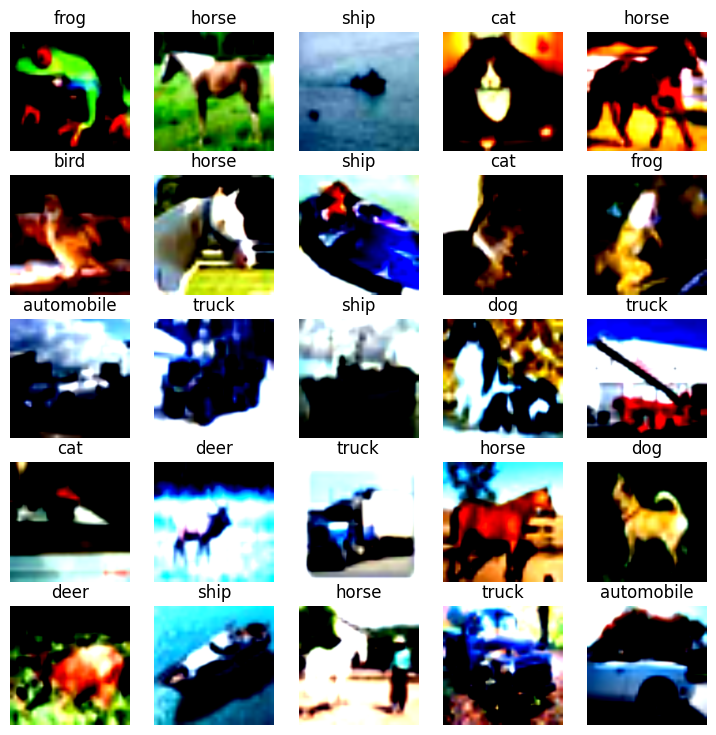

In [16]:
class_names = train_dataset.classes
# Plot 16 images on a grid of 4 x 4 images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    # Plot the image, but first permute the dimensions to ensure the
    # color channels are the last ones, as expected by imshow()
    plt.imshow(img.permute(1,2,0))
    plt.title(class_names[label])
    plt.axis(False)

The "Clipping input data" warnings are issued by Matplotlib’s `imshow` function, which expects pixel values to be within the range `[0, 1]` or `[0, 255]`.
However, since we applied normalization, some values may fall outside this range—becoming negative or exceeding 1.

For visualization purposes, it’s better to display the data before applying any transformations.

### 3.5 Using Torchvision pre-defined transforms

The Torchvision library provides a set of pre-defined transforms for each pretrained model.

The following code shows how to retrieve the weights for the Torchvision EfficientNet_B0 model pretrained with ImageNet1k dataset.

In [17]:
# Load the weights of the EfficientNet_B0 model when pretrained with the IMAGENET1K_V1 dataset
weights = torchvision.models.EfficientNet_B0_Weights.IMAGENET1K_V1

print("Weights:", weights)

Weights: EfficientNet_B0_Weights.IMAGENET1K_V1


In earlier versions of torchvision (prior to 1.13), users had to manually define transformation pipelines based on the specific pretrained weights they were using.
In contrast, newer versions of the library offer built-in transformation sequences tailored to each set of pretrained model weights.

You can use the `transforms()` method to retrieve these predefined transformation pipelines and normalize your data, as shown below.

In [18]:
torchvision_transforms = weights.transforms()

print("Data transform object:", torchvision_transforms)

Data transform object: ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


The transformation above resizes the image to 256x256, center-crops it to 224x224, and normalizes the pixel values using the mean and standard deviation from the ImageNet dataset.

Ideally, you should normalize your data using the mean and standard deviation computed from your own dataset.
However, if your dataset’s statistics are similar to those of ImageNet, using ImageNet’s values will cause little to no negative impact.
> Note: you should always evaluate your dataset data distribution before assuming they are similar to ImageNet's data distribution. If they are not similar, I recommend designing your own set of data transforms instead of employing torchvision's default transforms.

Lets instantiate the dataset using this data transform and check the statistics.

In [19]:
train_dataset, test_dataset = get_CIFAR10(data_transforms=torchvision_transforms)

for subset_name, subset in [ ("train", train_dataset), ("test", test_dataset) ]:
    mean, std = compute_mean_std(subset)
    print(f"{subset_name} statistics: mean = {mean} / std = {std}")

train statistics: mean = tensor([0.0163, 0.0860, 0.1479]) / std = tensor([1.0537, 1.0608, 1.1305])
test statistics: mean = tensor([0.0300, 0.1003, 0.1648]) / std = tensor([1.0531, 1.0594, 1.1319])


Hmm, not as good as before, but not so bad either.

### 3.6 Spliting the data and generating our data loaders

Ok, now it is time for us to split our train data and generate our data loaders.

We will generate the dataset again to use the sequence of data transforms that employ the dataset statistics to normalize the data.

In [20]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
data_transforms = transforms.Compose([
    transforms.ToTensor(), # 1. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616]), # 2. Normalize the samples
    transforms.Resize((224, 224)), # 3. Reshape all images to 224x224 (though some models may require different sizes)
])

train_dataset, test_dataset = get_CIFAR10(data_transforms=data_transforms)

class_names = train_dataset.classes

Now, let's split the train data into train and validation sets.

The code below performs this split based on the specified `train_ratio` and `val_ratio` parameters.
If the sum of these ratios is less than 1.0 (i.e., 100%), the unused portion of the dataset will be discarded.
For example, if `train_ratio=0.4` and `val_ratio=0.1`, then 50% of the dataset will be ignored.

This feature can be useful if you wish to reduce the sizes of the training and validation sets, which can help lower the time required for model training and other operations.

In [21]:
from torch.utils.data import random_split

def split_dataset_train_val(dataset, train_ratio=0.8, val_ratio=0.2, random_seed=None):
    total_size = len(dataset)
    train_size = int(train_ratio * total_size)
    val_size = int(val_ratio * total_size)
    discard_size = total_size - (train_size+val_size)
    if random_seed:
        torch.manual_seed(random_seed)

    # Split the dataset
    train_data, val_data, discard_data = random_split(dataset, [train_size, val_size, discard_size])
    return train_data, val_data

In [22]:
train_data, val_data = split_dataset_train_val(train_dataset, 0.8, 0.2, 42)
print("len(train subset):", len(train_data))
print("len(val subset):", len(val_data))
print("len(test set):", len(test_dataset))

len(train subset): 40000
len(val subset): 10000
len(test set): 10000


Finally, lets create the dataloaders

In [23]:
DL_BATCH_SIZE = 32
DL_NUM_WORKERS = 0

train_dataloader = torch.utils.data.DataLoader(train_data,
                                           batch_size=DL_BATCH_SIZE,
                                           num_workers=DL_NUM_WORKERS,
                                           drop_last=False,
                                           shuffle=True)

val_dataloader = torch.utils.data.DataLoader(val_data,
                                          batch_size=DL_BATCH_SIZE,
                                          num_workers=DL_NUM_WORKERS,
                                          shuffle=False)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=DL_BATCH_SIZE,
                                          num_workers=DL_NUM_WORKERS,
                                          shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {DL_BATCH_SIZE}")
print(f"Length of validation dataloader: {len(val_dataloader)} batches of {DL_BATCH_SIZE}")
print(f"Length of validation dataloader: {len(test_dataloader)} batches of {DL_BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79b8b9667490>, <torch.utils.data.dataloader.DataLoader object at 0x79b8b1c80950>)
Length of train dataloader: 1250 batches of 32
Length of validation dataloader: 313 batches of 32
Length of validation dataloader: 313 batches of 32


## <a id="sec_4">4. Instantiating and adapting the pretrained model</a>

In previous tutorials, we built PyTorch neural networks from scratch.

While that’s an essential skill, the performance of those models might have left room for improvement.

This is where **transfer learning** comes into play.

The core concept behind transfer learning is to **take a model that’s already been trained on a similar problem and fine-tune it for your specific task**.

Since we’re working on an image classification problem with CIFAR-100, we can leverage pretrained models available in [`torchvision.models`](https://pytorch.org/vision/stable/models.html#classification).

Browsing through the documentation, you’ll find many popular computer vision models, including:

| **Architecuture backbone** | **Code** |
| ----- | ----- |
| [ResNet](https://arxiv.org/abs/1512.03385)'s | `torchvision.models.resnet18()`, `torchvision.models.resnet50()`... |
| [VGG](https://arxiv.org/abs/1409.1556) (similar to what we used for TinyVGG) | `torchvision.models.vgg16()` |
| [EfficientNet](https://arxiv.org/abs/1905.11946)'s | `torchvision.models.efficientnet_b0()`, `torchvision.models.efficientnet_b1()`... |
| [VisionTransformer](https://arxiv.org/abs/2010.11929) (ViT's)| `torchvision.models.vit_b_16()`, `torchvision.models.vit_b_32()`... |
| [ConvNeXt](https://arxiv.org/abs/2201.03545) | `torchvision.models.convnext_tiny()`,  `torchvision.models.convnext_small()`... |
| More available in `torchvision.models` | `torchvision.models...` |

### 4.1 Which pretrained model should you use?

It depends on your problem/the device you're working with.

Generally, the higher number in the model name (e.g. `efficientnet_b0()` -> `efficientnet_b1()` -> `efficientnet_b7()`) means *better performance* but a *larger* model.

You might think better performance is *always better*, right?

That's true but **some better performing models are too big for some devices**.

For example, say you'd like to run your model on a mobile-device, you'll have to take into account the limited compute resources on the device, thus you'd be looking for a smaller model.

But if you've got unlimited compute power, as [*The Bitter Lesson*](http://www.incompleteideas.net/IncIdeas/BitterLesson.html) states, you'd likely take the biggest, most compute hungry model you can.

Understanding this **performance vs. speed vs. size** tradeoff will come with time and practice.

In this tutorial, we’ll be using the `efficientnet_bX` models.
That said, you could just as easily choose `resnet50` or any of the other models available in `torchvision.models`.
> **Note:** While we’re working with `efficientnet_bX` here, try not to get too attached to any single architecture.
The field of deep learning evolves rapidly as new research and models emerge.
The key is to experiment and find what works best for your specific task.


### 4.2 Instantiating the model with pretrained weights

The pretrained model we will be using is [`torchvision.models.efficientnet_b0()`](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b0.html).

The architecture is from the paper *[EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)*.

<img src="https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/06-effnet-b0-feature-extractor.png" alt="efficienet_b0 from PyTorch torchvision feature extraction model" width=900/>

*Example from Daniel's tutorial, in which he leverages a pretrained [`EfficientNet_B0` model](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html) from `torchvision.models` to create a model for his use case of classifying pizza, steak and sushi images.*

We can setup the `EfficientNet_B0` pretrained ImageNet weights using the same code as we used to create the transforms.

```python
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights for ImageNet
```

This means the model has already been trained on millions of images and has a good base representation of image data.

The PyTorch version of this pretrained model is capable of achieving ~77.7% accuracy across ImageNet's 1000 classes.

We'll also send it to the target device.

In [24]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights

model = torchvision.models.efficientnet_b0(weights=weights).to(device)

# model # uncomment to output (it's very long)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 157MB/s]


If we print the model, we get something similar to the following:

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-v2-effnetb0-model-print-out.png" alt="output of printing the efficientnet_b0 model from torchvision.models" width=900/>

Lots and lots and lots of layers.

This is one of the benefits of transfer learning, taking an existing model, that's been crafted by some of the best engineers in the world and applying to your own problem.

Our `efficientnet_b0` comes in three main parts:
1. `features` - A collection of convolutional layers and other various activation layers to learn a base representation of vision data (this base representation/collection of layers is often referred to as **features** or **feature extractor**, "the base layers of the model learn the different **features** of images").
2. `avgpool` - Takes the average of the output of the `features` layer(s) and turns it into a **feature vector**.
3. `classifier` - Turns the **feature vector** into a vector with the same dimensionality as the number of required output classes (since `efficientnet_b0` is pretrained on ImageNet and because ImageNet has 1000 classes, `out_features=1000` is the default).

### 4.3 Getting a summary of our model with `torchinfo.summary()`

To learn more about our model, let's use `torchinfo`'s [`summary()` method](https://github.com/TylerYep/torchinfo#documentation).

To do so, we'll pass in:
 * `model` - the model we'd like to get a summary of.
 * `input_size` - the shape of the data we'd like to pass to our model, for the case of `efficientnet_b0`, the input size is `(batch_size, 3, 224, 224)`, though [other variants of `efficientnet_bX` have different input sizes](https://github.com/pytorch/vision/blob/d2bfd639e46e1c5dc3c177f889dc7750c8d137c7/references/classification/train.py#L92-L93).
    * **Note:** Many modern models can handle input images of varying sizes thanks to [`torch.nn.AdaptiveAvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html), this layer adaptively adjusts the `output_size` of a given input as required. You can try this out by passing different size input images to `summary()` or your models.
 * `col_names` - the various information columns we'd like to see about our model.
 * `col_width` - how wide the columns should be for the summary.
 * `row_settings` - what features to show in a row.

Let's start by importing the `summary` function from the `torchinfo` module.

In [25]:
try:
    from torchinfo import summary
except:
    try:
        #Try to install it and import again
        print("[INFO]: Could not import summary from torchinfo module. Trying to install torchinfo!")
        !pip install torchinfo
        from torchinfo import summary
    except:
        raise Exception("[ERROR] Couldn't find the torchinfo module ... \n" +
                        "Please, install it before running the notebook.\n"+
                        "You might want to install the modules listed at requirements.txt\n" +
                        "To do so, run: \"pip install -r requirements.txt\"")

[INFO]: Could not import summary from torchinfo module. Trying to install torchinfo!


Alright. Now, lets use the `summary` function to inspect our model.

In [26]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-unfrozen-layers.png" alt="output of torchinfo.summary() when passed our model with all layers as trainable" width=900/>

From the output of the summary, we can see all of the various input and output shape changes as our image data goes through the model.

And there are a whole bunch more total parameters (pretrained weights) to recognize different patterns in our data.

For reference, one of our models from previous tutorials, **TinyVGG had 8,083 parameters vs. 5,288,548 parameters for `efficientnet_b0`, an increase of ~654x**!

### 4.4 Freezing the base model and changing the output layer to suit our needs

The previous model has a large number of parameters, which increases the risk of overfitting to the training data.

A common strategy to mitigate this when reusing pretrained models is to freeze the early layers—typically the features or backbone section—and only train the final layers, often referred to as the head or classifier.

> **Note:** To *freeze* layers means to keep them how they are during training. For example, if your model has pretrained layers, to *freeze* them would be to say, "don't change any of the patterns in these layers during training, keep them how they are." In essence, we'd like to keep the pretrained weights/patterns our model has learned from ImageNet as a backbone and then only change the output layers.

You can customize the outputs of a pretrained model by modifying its output layer(s) to match your specific task.
For example, the default `torchvision.models.efficientnet_b0()` is configured with `out_features=1000`, corresponding to the 1,000 classes in the ImageNet dataset it was originally trained on.
However, for our task—classifying images from the CIFAR-10 dataset—we only need `out_features=10`.

The image below illustrates this concept (*).
> (*) The image shows an example from Daniel's work, where the model was adapted to classify images into three classes. In our case, we’ll adapt the model for ten classes, as required by the CIFAR-10 dataset.

<img src="https://raw.githubusercontent.com/eborin/SSL-course/main/images/db/06-v2-effnet-changing-the-classifier-head.png" alt="changing the efficientnet classifier head to a custom number of outputs" width=900/>

Let's freeze all of the layers/parameters in the `features` section of our `efficientnet_b0` model.
To do so, we can set the `require_grad` attributes the parameteres in these layers as `False`.
> Note: For parameters with `requires_grad=False`, PyTorch doesn't track gradient updates and in turn, these parameters won't be changed by our optimizer during training.

In essence, a parameter with `requires_grad=False` is "untrainable" or "frozen" in place.

In [27]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

Lets check the model again.

In [28]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

Feature extractor layers frozen!

Let's now adjust the output layer or the `classifier` portion of our pretrained model to our needs.

Right now our pretrained model has `out_features=1000` because there are 1000 classes in ImageNet.

However, we don't have 1000 classes, we only have 10.

We can change the `classifier` portion of our model by creating a new series of layers.

The current `classifier` consists of:

```
(classifier): Sequential(
    (0): Dropout(p=0.2, inplace=True)
    (1): Linear(in_features=1280, out_features=1000, bias=True)
```

In [29]:
print(model.classifier)

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)


Now, let's replace the classifier layers.

We'll keep the `Dropout` layer the same using [`torch.nn.Dropout(p=0.2, inplace=True)`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html).

> **Note:** [Dropout layers](https://developers.google.com/machine-learning/glossary#dropout_regularization) randomly remove connections between two neural network layers with a probability of `p`.
For example, if `p=0.2`, 20% of connections between neural network layers will be removed at random each pass.
This practice is meant to help regularize (prevent overfitting) a model by making sure the connections that remain learn features to compensate for the removal of the other connections (hopefully these remaining features are *more general*).

And we'll keep `in_features=1280` for our `Linear` output layer but we'll change the `out_features` value to the length of our `class_names` (`len(class_names) = 10`).

Our new `classifier` layer should be on the same device as our `model`.

In [30]:
# Set the seeds
set_seed(42)

# Get the length of class_names (one output unit for each class)
number_of_classes = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=number_of_classes, # same number of output units as our number of classes
                    bias=True)).to(device)

Nice!

Output layer updated, let's get another summary of our model and see what's changed.

In [31]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 10]             --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-frozen-layers.png" alt="output of torchinfo.summary() after freezing multiple layers in our model and changing the classifier head" width=900/>

Ho, ho! There's a fair few changes here!

Let's go through them:
* **Trainable column** - You'll see that many of the base layers (the ones in the `features` portion) have their Trainable value as `False`.
This is because we set their attribute `requires_grad=False`.
Unless we change this, these layers won't be updated during future training.
* **Output shape of `classifier`** - The `classifier` portion of the model now has an Output Shape value of `[32, 10]` instead of `[32, 1000]`.
It's Trainable value is also `True`.
This means its parameters will be updated during training.
In essence, we are using the `features` portion to feed our `classifier` portion a base representation of an image and then our `classifier` layer is going to learn how to base representation aligns with our problem.
* **Less trainable parameters** - Previously there were 5,288,548 trainable parameters.
But since we froze many of the layers of the model and only left the `classifier` as trainable, there's now only 12,810 trainable parameters.
Though there's also 4,020,358 non-trainable parameters, these will create a base representation of our input images to feed into our `classifier` layer.

> **Note:** The more trainable parameters a model has, the more compute power/longer it takes to train. Freezing the base layers of our model and leaving it with less trainable parameters means our model should train quite quickly.
This is one huge benefit of transfer learning, taking the already learned parameters of a model trained on a problem similar to yours and only tweaking the outputs slightly to suit your problem.

## <a id="sec_5">5. Fine-tuning our partially frozen model</a>

Now we've got a pretrained model that is semi-frozen and has a customised `classifier` lets see the transfer learning in action?

### 5.1 Helper function to compute the model accuracy

Let's create a small function to compute the model accuracy by comparing the results produced by the model (`y_pred`) against the ground truth (`y_true`).

In [32]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 5.2 Creating our training loop

Let's define a function to train our model.

As in previous tutorials, the function will include a loop that iterates over epochs and batches from the dataloaders.

We'll use cross-entropy loss as our loss function and the Adam optimizer for model optimization.
Additionally, we'll incorporate an early stopping mechanism by keeping track of the model with the best validation loss during training.

In [33]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Import the default_timer from timeit to time the training process
from timeit import default_timer as timer

def train_model(model, train_dataloader, val_dataloader, device, ckpt_filename, nepochs=3):

    # Set the seed
    torch.manual_seed(42)

    model = model.to(device)

    # Setup the loss function. This is also called "criterion"/"cost function" in some places
    # The cross entropy loss is more adequate for classification problems.
    loss_fn = nn.CrossEntropyLoss()

    # Setup the optimizer
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

    # Lists to store the training losses, validation losses, and validation accuracies over epochs
    training_losses, val_losses, val_accs = [], [], []

    # Register the start time
    train_start_time = timer()

    best_val_loss = None

    # For each epoch, do
    for epoch in range(nepochs):

        print(f"----------------------\nEpoch: {epoch+1} / {nepochs}")

        ### Variable to register the accumulated training loss
        train_loss = 0.0

        # For each batch in the training dataloader, do:
        for _, (X, y) in tqdm(enumerate(train_dataloader), total=len(train_dataloader), unit=" batches", desc="Training  "):

            X, y = X.to(device), y.to(device)

            model.train()
            # 1. Forward pass
            y_pred = model(X)
            # 2. Calculate loss (per batch)
            loss = loss_fn(y_pred, y)
            train_loss += loss.cpu().detach() # Accumulates the training losses
            # 3. Optimizer zero grad
            optimizer.zero_grad()
            # 4. Loss backward
            loss.backward()
            # 5. Optimizer step
            optimizer.step()
            # Print out how many samples have been seen
            # if batch % 400 == 0: print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

        # Divide total train loss by length of train dataloader (average loss per batch per epoch)
        avg_train_loss = train_loss / len(train_dataloader)
        training_losses.append(avg_train_loss)
        ### Validating
        # Setup variables for accumulatively adding up loss and accuracy
        val_loss, val_acc = 0, 0
        model.eval()
        with torch.inference_mode():
            # For each batch in the validation dataloader, do:
            for _, (X, y) in tqdm(enumerate(val_dataloader), total=len(val_dataloader), unit=" batches", desc="Validation"):

                X, y = X.to(device), y.to(device)
                # 1. Forward pass
                val_pred = model(X)
                # 2. Calculate loss (accumulatively)
                loss = loss_fn(val_pred, y) # accumulatively add up the loss per epoch
                val_loss += loss.cpu().detach()
                # 3. Calculate accuracy (preds need to be same as y_true)
                val_acc += accuracy_fn(y_true=y, y_pred=val_pred.argmax(dim=1))

            # Save parameters if validation loss is improved
            if ckpt_filename:
                if (best_val_loss == None) or (val_loss < best_val_loss):
                    best_val_loss = val_loss
                    torch.save(obj=model.state_dict(), f=ckpt_filename)

            # Calculations on val metrics need to happen inside torch.inference_mode()
            # Divide total val loss by length of val dataloader (per batch)
            avg_val_loss = val_loss / len(val_dataloader)
            val_losses.append(avg_val_loss)

            # Divide total accuracy by length of val dataloader (per batch)
            val_acc /= len(val_dataloader)
            val_accs.append(val_acc)

        ## Print out what's happening
        print(f"Train loss: {avg_train_loss:.5f} | Validation loss: {avg_val_loss:.5f}, Validation accuracy: {val_acc:.2f}%\n")

    # Register the stop time
    train_stop_time = timer()
    training_elapsed_time = train_stop_time - train_start_time

    # Return the elapsed training time, the training losses,
    # the validation losses, and the validation accuracies
    return training_elapsed_time, training_losses, val_losses, val_accs

### 5.3 Training the model

Now that we have a dataloader, a model and a training loop, lets train our model.

The next code block trains the model for 10 epochs.

In [34]:
number_of_epochs = 10

training_elapsed_time, training_losses, val_losses, val_accs = \
   train_model(model, train_dataloader, val_dataloader,
               device=device, ckpt_filename="./05_pretrained_freeze.pth",
               nepochs=number_of_epochs)

----------------------
Epoch: 1 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.92181 | Validation loss: 0.62571, Validation accuracy: 79.07%

----------------------
Epoch: 2 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.73200 | Validation loss: 0.58744, Validation accuracy: 80.17%

----------------------
Epoch: 3 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.71162 | Validation loss: 0.57371, Validation accuracy: 80.49%

----------------------
Epoch: 4 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.70444 | Validation loss: 0.55877, Validation accuracy: 80.67%

----------------------
Epoch: 5 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.69627 | Validation loss: 0.55627, Validation accuracy: 81.13%

----------------------
Epoch: 6 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.69125 | Validation loss: 0.56084, Validation accuracy: 81.14%

----------------------
Epoch: 7 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.68725 | Validation loss: 0.55312, Validation accuracy: 80.65%

----------------------
Epoch: 8 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.68175 | Validation loss: 0.55060, Validation accuracy: 80.96%

----------------------
Epoch: 9 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.68692 | Validation loss: 0.55186, Validation accuracy: 81.23%

----------------------
Epoch: 10 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.68309 | Validation loss: 0.55073, Validation accuracy: 80.94%



Let's load the weights of the best epoch (the one that achieved the best validation loss).

In [35]:
model.load_state_dict(torch.load(f="./05_pretrained_freeze.pth"))

<All keys matched successfully>

Now, let's take a look at the training statistics, including the training and validation loss curves and at accuracy of the model on the validation set over the epochs.

== Training statistics ==
 - Elapsed time: 1227.348 seconds
 - # of epochs: 10
 - Best validation accuracy: 81.23 %
 - Validation accuracy in the last epoch: 80.94 %
== Training and Validation losses ==


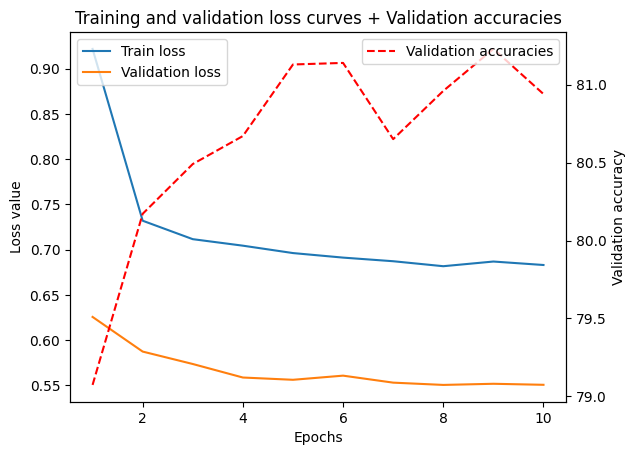

In [36]:
def show_training_statistics(training_elapsed_time, training_losses, val_accs):
    print("=========================")
    print("== Training statistics ==")
    print("=========================")
    print(f" - Elapsed time: {training_elapsed_time:.3f} seconds")
    print(f" - # of epochs: {len(training_losses)}")
    best_v_acc, last_v_acc = max(val_accs), val_accs[-1]
    print(f" - Best validation accuracy: {best_v_acc:.2f} %")
    print(f" - Validation accuracy in the last epoch: {last_v_acc:.2f} %")
    print("====================================")
    print("== Training and Validation losses ==")
    print("====================================")
    # Plot the loss curves
    epoch_indices = range(1, len(training_losses) + 1)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() # Secondary y-axis (to plot the accuracy)
    # Plot the validation and train loss on the primary y-axis
    ax1.set_ylabel('Loss value')
    ax1.plot(epoch_indices, training_losses, label="Train loss")
    ax1.plot(epoch_indices, val_losses, label="Validation loss")
    ax1.set_xlabel("Epochs")
    # Plot the validation accuracy on the secondary y-axis
    ax2.set_ylabel('Validation accuracy')
    ax2.plot(epoch_indices, val_accs, 'r--', label="Validation accuracies")
    # Set title and legend
    plt.title("Training and validation loss curves + Validation accuracies")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.show()

show_training_statistics(training_elapsed_time=training_elapsed_time,
                         training_losses=training_losses,
                         val_accs=val_accs)

Done! Now, lets check the performance of the model on the test set and plot the confusion matrix.

Making predictions for test set:   0%|          | 0/313 [00:00<?, ?it/s]

Accuracy on test set: 81.05 %


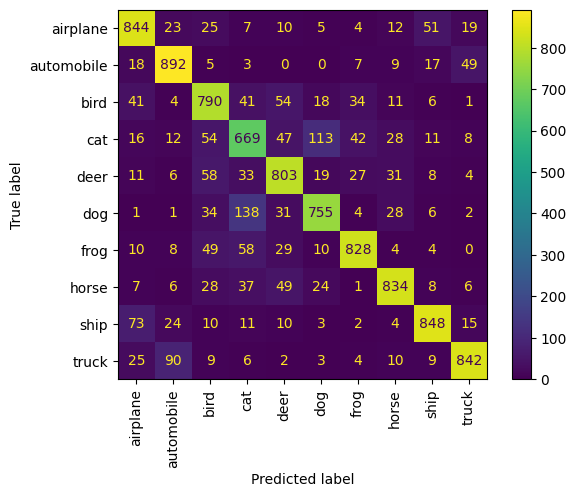

In [37]:
from tqdm.auto import tqdm
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_model_accuracy_and_confusion_matrix(model, dl, ds_name):
  y_preds, y_trues = [], []
  model.eval()
  acc = 0.0
  with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc=f"Making predictions for {ds_name}"):
      X, y = X.to(device), y.to(device)
      # Do the forward pass
      y_logit = model(X)
      # Turn predictions from logits -> prediction probabilities -> predictions labels
      #  note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
      y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
      # Put predictions on CPU for evaluation
      y_preds.append(y_pred.cpu().numpy())
      y_trues.append(y.cpu().numpy())
      acc += accuracy_fn(y_true=y, y_pred=y_pred)
  acc /= len(test_dataloader)
  # Concatenate list of predictions into a tensor
  y_preds = np.concatenate(y_preds)
  y_trues = np.concatenate(y_trues)
  print(f"Accuracy on {ds_name}: {acc:0.2f} %")
  cm = confusion_matrix(y_true=y_trues, y_pred=y_preds)
  ConfusionMatrixDisplay(cm,display_labels=class_names).plot(xticks_rotation="vertical")
  return acc

test_acc = show_model_accuracy_and_confusion_matrix(model, test_dataloader, "test set")

Nice! The performance looks promising.

In the next section, we’ll compare this model’s performance with two alternatives: one trained from scratch (without pretraining) and another pretrained model with full fine-tuning.
But before we move on, let’s save some of these statistics in a dictionary so we can reference them later.

In [38]:
models_stats = {}

models_stats["pretrained+freeze"] = \
    {"training_time": training_elapsed_time,
     "training_losses": training_losses,
     "validation_losses": val_losses,
     "validation_accs": val_accs,
     "test_acc": test_acc}

## <a id="sec_6">6. Freezing vs. Full Fine-Tuning vs. Training from Scratch</a>

In this section we will compare the previous model's performance with two alternatives: one trained from scratch (without pretraining) and another pretrained model with full fine-tuning.
To do so, we will build, train and evaluate these two new alternatives.

### 6.1 Training with full fine-tuning

First, lets create the model, but keep the parameters trainable.

In [39]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights

model_full_ft = torchvision.models.efficientnet_b0(weights=weights).to(device)

# Recreate the classifier layer and seed it to the target device
model_full_ft.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=number_of_classes, # same number of output units as our number of classes
                    bias=True)).to(device)

Now, lets train the model for the same number of epochs.

In [40]:
training_elapsed_time, training_losses, val_losses, val_accs = \
   train_model(model_full_ft, train_dataloader, val_dataloader,
               device=device, ckpt_filename="./05_pretrained_fullfinetune.pth",
               nepochs=number_of_epochs)

----------------------
Epoch: 1 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.47351 | Validation loss: 0.28119, Validation accuracy: 90.19%

----------------------
Epoch: 2 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.27542 | Validation loss: 0.21964, Validation accuracy: 92.53%

----------------------
Epoch: 3 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.21722 | Validation loss: 0.23070, Validation accuracy: 92.38%

----------------------
Epoch: 4 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.17689 | Validation loss: 0.19493, Validation accuracy: 93.38%

----------------------
Epoch: 5 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.15422 | Validation loss: 0.21029, Validation accuracy: 93.02%

----------------------
Epoch: 6 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.13120 | Validation loss: 0.19962, Validation accuracy: 93.38%

----------------------
Epoch: 7 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.11328 | Validation loss: 0.22643, Validation accuracy: 92.85%

----------------------
Epoch: 8 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.10219 | Validation loss: 0.20026, Validation accuracy: 93.82%

----------------------
Epoch: 9 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.09263 | Validation loss: 0.23949, Validation accuracy: 92.63%

----------------------
Epoch: 10 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.08377 | Validation loss: 0.23584, Validation accuracy: 93.07%



Let's load the weights of the best epoch (the one that achieved the best validation loss).

In [41]:

model_full_ft.load_state_dict(torch.load(f="./05_pretrained_fullfinetune.pth"))

<All keys matched successfully>

Alright. Now, lets check the training statistics and the model performance on the test set.

== Training statistics ==
 - Elapsed time: 2134.047 seconds
 - # of epochs: 10
 - Best validation accuracy: 93.82 %
 - Validation accuracy in the last epoch: 93.07 %
== Training and Validation losses ==


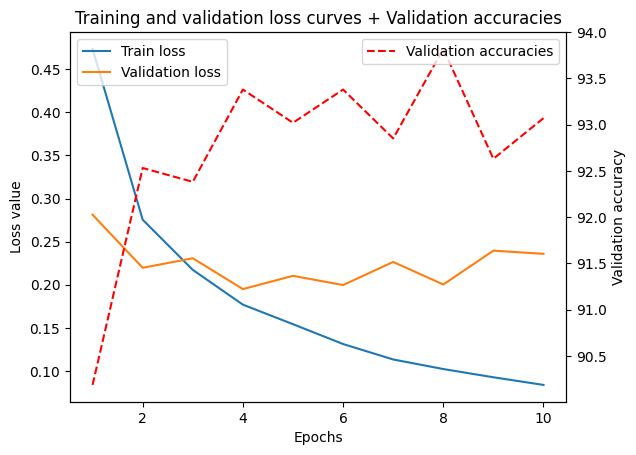

Making predictions for test set:   0%|          | 0/313 [00:00<?, ?it/s]

Accuracy on test set: 93.14 %


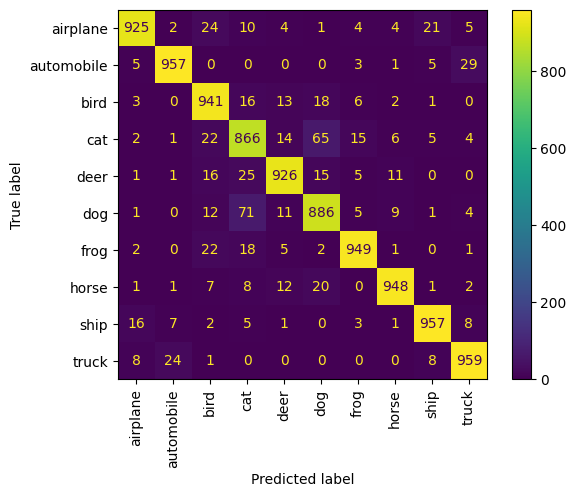

In [42]:
show_training_statistics(training_elapsed_time=training_elapsed_time,
                         training_losses=training_losses,
                         val_accs=val_accs)

test_acc = show_model_accuracy_and_confusion_matrix(model_full_ft, test_dataloader, "test set")

Again, lets save the statistics for this model.

In [43]:
models_stats["pretrained+fullfinetune"] = \
    {"training_time": training_elapsed_time,
     "training_losses": training_losses,
     "validation_losses": val_losses,
     "validation_accs": val_accs,
     "test_acc": test_acc}

### 6.2 Training from scratch (without transfer learning)

Now it's time to build, train, and evaluate our model without using transfer learning.

First, let’s create and adapt a model without loading any pretrained weights.

In [44]:
model_no_pretrain = torchvision.models.efficientnet_b0(weights=None).to(device)

# Recreate the classifier layer and seed it to the target device
model_no_pretrain.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=number_of_classes, # same number of output units as our number of classes
                    bias=True)).to(device)

The next code block trains the model for the same number of epochs.

In [45]:
training_elapsed_time, training_losses, val_losses, val_accs = \
   train_model(model_no_pretrain, train_dataloader, val_dataloader,
               device=device, ckpt_filename="./05_nopretrain_fullfinetune.pth",
               nepochs=number_of_epochs)

----------------------
Epoch: 1 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 1.56173 | Validation loss: 1.28073, Validation accuracy: 52.88%

----------------------
Epoch: 2 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.99436 | Validation loss: 0.84991, Validation accuracy: 70.26%

----------------------
Epoch: 3 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.73923 | Validation loss: 0.62259, Validation accuracy: 77.98%

----------------------
Epoch: 4 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.59708 | Validation loss: 0.54688, Validation accuracy: 81.23%

----------------------
Epoch: 5 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.50653 | Validation loss: 0.51524, Validation accuracy: 81.95%

----------------------
Epoch: 6 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.42914 | Validation loss: 0.45342, Validation accuracy: 84.43%

----------------------
Epoch: 7 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.37105 | Validation loss: 0.42908, Validation accuracy: 85.45%

----------------------
Epoch: 8 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.31648 | Validation loss: 0.43594, Validation accuracy: 85.15%

----------------------
Epoch: 9 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.28302 | Validation loss: 0.41531, Validation accuracy: 86.06%

----------------------
Epoch: 10 / 10


Training  :   0%|          | 0/1250 [00:00<?, ? batches/s]

Validation:   0%|          | 0/313 [00:00<?, ? batches/s]

Train loss: 0.23885 | Validation loss: 0.46100, Validation accuracy: 85.74%



Let's load the weights of the best epoch (the one that achieved the best validation loss).

In [46]:
model_no_pretrain.load_state_dict(torch.load(f="./05_nopretrain_fullfinetune.pth"))

<All keys matched successfully>

Now, let's take a look at the training statistics and check performance of the model on the test set.

== Training statistics ==
 - Elapsed time: 2131.434 seconds
 - # of epochs: 10
 - Best validation accuracy: 86.06 %
 - Validation accuracy in the last epoch: 85.74 %
== Training and Validation losses ==


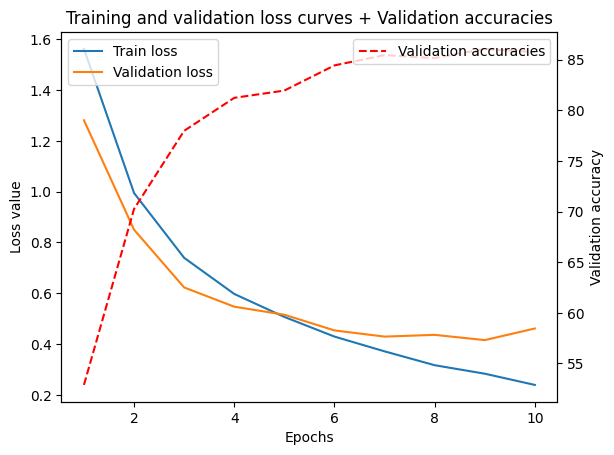

Making predictions for test set:   0%|          | 0/313 [00:00<?, ?it/s]

Accuracy on test set: 85.74 %


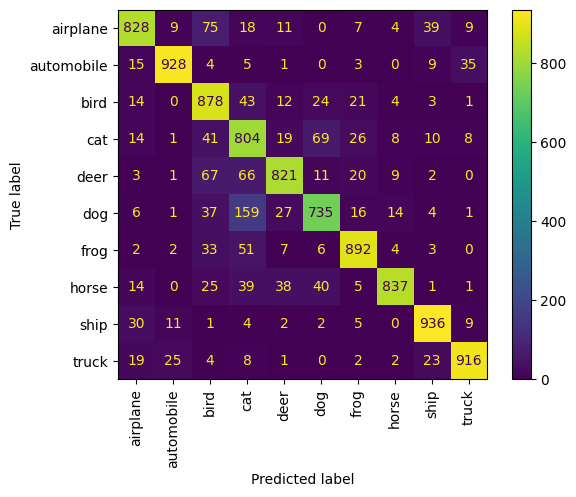

In [47]:
show_training_statistics(training_elapsed_time=training_elapsed_time,
                         training_losses=training_losses,
                         val_accs=val_accs)

test_acc = show_model_accuracy_and_confusion_matrix(model_no_pretrain, test_dataloader, "test set")

Ok. Lets also save the statistics for this model.

In [48]:
models_stats["nopretrain+fullfinetune"] = \
    {"training_time": training_elapsed_time,
     "training_losses": training_losses,
     "validation_losses": val_losses,
     "validation_accs": val_accs,
     "test_acc": test_acc}

### 6.3 Comparing the model's performance

All models were trained and their performance statistics were stored in the `models_stats` dictionary.
Now, let's compare the results of these different approaches.

Let's start by comparing their accuracy on the test dataset.

In [49]:
print(f"Model                     Test accuracy    Training time")
print('-'*56)
for model_name, stats in models_stats.items():
    acc = stats["test_acc"]
    training_time = stats["training_time"]
    print(f"{model_name:25s} {acc:11.2f} % {training_time:14.2f} s" )

Model                     Test accuracy    Training time
--------------------------------------------------------
pretrained+freeze               81.05 %        1227.35 s
pretrained+fullfinetune         93.14 %        2134.05 s
nopretrain+fullfinetune         85.74 %        2131.43 s


As expected, the `pretrained+freeze` model trained faster, since it has fewer parameters to update during training.

The fully fine-tuned pretrained model outperformed the other configurations, indicating that full fine-tuning did not result in overfitting.

Additionally, the model trained from scratch (no pretraining + full fine-tuning) achieved better performance than the pretrained model with frozen feature extractors.
This suggests two possible reasons:
* (i) the features learned from the ImageNet dataset may not transfer well to the CIFAR-10 task, or
* (ii) the prediction head (i.e., the layers added on top of the feature extractor) may be too simplistic, necessitating adaptation of the earlier layers for optimal performance.

Next, we examine the validation accuracies across the training epochs.

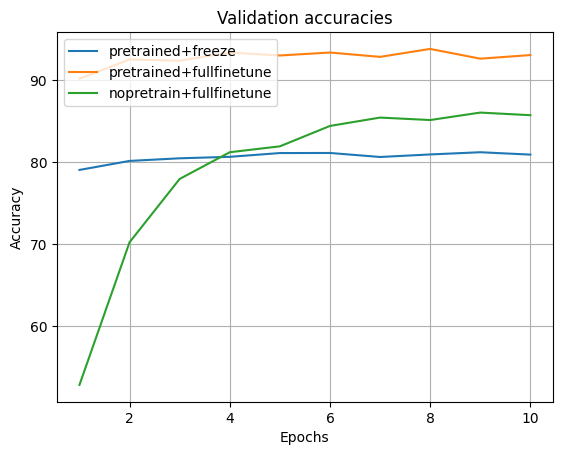

In [50]:
# Plot the validation accuracy curves

epoch_indices = range(1, len(models_stats["pretrained+freeze"]["validation_accs"]) + 1)
fig, ax1 = plt.subplots()
ax1.set_ylabel('Accuracy')
for model_name, stats in models_stats.items():
    validation_accs = stats["validation_accs"]
    ax1.plot(epoch_indices, validation_accs, label=f"{model_name}")
ax1.set_xlabel("Epochs")
# Set title and legend
plt.title("Validation accuracies")
plt.grid()
ax1.legend(loc="upper left")
plt.show()

It is worth noting that the pretrained models begin with higher initial accuracies, thanks to the pretrained weights.
However, the validation accuracy of the pretrained + frozen model shows minimal improvement over the epochs.
This is likely because only the parameters in the final layer are trainable, limiting the model's capacity to adapt during training.



## <a id="sec_7">7. Exercises</a>

While there is no designated exercise for this tutorial, the following activities can provide valuable insights into factors that influence model performance:
* Explore how different model architectures (e.g., ResNet50) or model weights affect training time and model performance.
* Explore how different prediction heads (i.e., the layers attached to the pretrained model) affect training time and model performance.
